# まえがき

近年台風や梅雨前線，爆弾低気圧に伴う顕著な気象や猛暑・冷夏や暖冬，寒波・大雪のような異常天候が数多く発生しています。その背景には，自然に内在する変動だけでなく地球温暖化や都市化など人間活動の影響が指摘されています。気象や気候への関心が高まる中，観測や予測データは飛躍的に増大し，容易に入手できるようになってきました。同時に，データを解析し可視化するための道具も進化し続けています。宝の山に眠る有益な情報をいかに取り出し，気象や気候の診断や予測，そして理解につなげるかが問われています。

本書は，気象や気候データの解析にこれから取り組もうという読者を対象として，現在最も人気のある言語の一つであるPythonを使った気象データサイエンスについて解説します。気象データサイエンスは，気象学はもちろん，統計学，線型代数学，情報理論，推定論に基盤を持ち，発展著しい機械学習とも深いつながりがあります。本書はこれらの教科書やPythonのドキュメントの代りになるものではなく，ライブラリの解説書でもありません。本書は，実際に手を動かしてデータを可視化し解析することによって，気象に対する理解を深めることを目的にしています。

本書は次のような構成になっています。まず，教科書で目にするような図を自分で描いてみることからはじめます。プログラミングがはじめての読者も，いくつか図を描くうちにPythonになじんでいきましょう。次にさまざまなデータの扱い方を学びます。気象データには，テキストやバイナリなどさまざまな種類があり，独特のフォーマットが用いられています。これらを読んで処理する方法を身に着けます。後半は，気象データ解析の実例を示します。梅雨前線や偏西風，台風などを例にした力学・熱力学解析手法や年々変動データを題材にした統計解析を行います。

気象学と気象データの扱い方や解析手法の基礎を身に着けて，より大きなデータや高度な解析に取り組み，読者が業務や研究で成果を上げてくれることを期待しています。

# はじめの一歩

Pythonは最も人気のあるプログラミング言語です。人工知能や機械学習が盛んになったことで，Pythonの勢いは一層増しています。気象学においてもPython利用者が増加しています。この章では，これまで用いられてきた道具を概観した後，Pythonの特徴について述べます。Pythonの標準的な描画ライブラリであるmatplotlibを用いて簡単な図を描きます。Pythonを科学技術計算において基本的なパッケージであるNumpyの基本的な使い方についても学びます。

## Python環境の準備

始める前にPython環境を準備しましょう。自分のパソコンにPythonの環境を構築することもできますが，本書ではGoogle Colaboratoryで説明します。Google ColaboratoryはJupyter notebooksを提供するクラウドサービスで，負荷制限がありますが無料で利用できます。スクリプトの入力や結果の出力には，ウェブブラウザを用います。Googleアカウント（Gメールアドレス）が必要ですので，お持ちでない方はGoogleのログイン画面で「アカウントを作成」をクリックして作成してください。

### Colaboratoryの追加

Googleドライブにフォルダを作ります。ドライブでドキュメントやスプレッドシート，スライド同様にColaboratoryのファイルが作成できるように，Colaboratoryのアプリケーションを追加します。作成したフォルダ名クリックして「アプリで開く」を選択すると「+アプリを追加」が出てきます。
![drive](figures/drive.png)
「apps内を検索」にColaboratoryと入力してください。右下の+のついたGoogleドライブのアイコンをクリックするとインストールされます。これで準備完了です。
![install](figures/install.png)

### ノートブックの作成

Googleドライブの「新規」ボタンから「その他」「Google Colaboratory」を選んでください。Jupyter notebooksのファイル（拡張子ipynb）が作成されます。「Untitled0.ipynb」のような名前がつけられますが，ファイル名をクリックすると変更できます。
![ipynb](figures/ipynb.png)

### 乾燥空気の平均分子量の計算

まずは簡単な計算をしてみます。地球大気の成分は窒素，酸素，アルゴンが主な成分です。容積比はそれぞれおよそ78%，21%，1%です。乾燥空気の平均分子量は容積比を重みとして分子量の平均を計算して求めることができます。

In [1]:
28 * 0.78 + 32 * 0.21 + 40 * 0.01

28.959999999999997

## コラム: 気象データの解析や可視化に用いられるツール

気象データの解析や可視化に用いられてきた道具を概観しておきたいと思います。気象データ解析においては，GrADSやNCLなどが用いられてきました。GrADSやNCLのような言語は，ドメイン固有言語（Domain Specific Language, DSL）と呼ばれています。つまり，気象データ（という領域，ドメイン）に用途が限定されているという意味です。DSLは用途を特定することにより，簡潔な記述が可能となる一方，独自の文法を覚えなければなりません。GrADSはTcl風の「コマンド 引数...」という簡潔な文法で対話的にデータを描画できます。NCLはFortran風の文法で，多様なデータを解析し，論文品質の図を描くことができます。Pythonが勢いを増す中，独自の言語を維持することが得策ではないと判断され，NCLはベースとなる言語をPythonに移行することがアナウンスされています。

日本においては，Fortranで書かれた地球流体電脳ライブラリが開発され，Rubyから使える電脳Rubyに発展してきました。言語は異なりますが，汎用スクリプト言語を採用した電脳Rubyは先見の明があったと思います。

ECMWFの描画ライブラリMagicsは，開発言語をFortranからC++に移し，CやFortran，Pythonから使えるインターフェースを提供しています。気象データ解析アプリケーションのMetviewの描画にもMagicsが用いられ，Macroと呼ばれるMetviewのDSLを使うこともできます。MagicsやMetviewも便利なのですが，本書ではNumpyとmatplotlibを中心にデータ解析や可視化の基礎を重視して解説します。

## Pythonの特徴

Pythonが親しまれている大きな理由は，簡潔に書けてソースコードが見やすいということにあると思います。C言語系統のC++やJavaには{}で文をまとめたブロックを表します。科学技術計算で長い間用いられてきたFortranではprogramに対してend program，ifに対してend ifなどが必要です。一方Pythonは字下げ（インデント）でブロックを表します。親しみやすいからといって，できることに制約が大きいということではありません。

Pythonにはデータ構造やテキスト処理，ファイル，ネットワーク等を扱う標準ライブラリが添付されています。さらに，Pythonが人気であることから，他の言語で作成されたツールやライブラリがPythonから使えるようにインターフェースが作成されています。
　本書で扱う気象データに限らず，Pythonを科学技術の問題に応用する際に欠かせないのが，Scipyです。Scipyは以下のようなオープンソースの数学や科学，工学ソフトウェアパッケージの総称です。
* Numpy: Pythonはリストや辞書のようなデータ構造を扱うことができますが，気象データのようなビッグデータを扱う機能は備わっていません。配列とそれに対する演算にはNumpyを用います。Numpyは，Fortranのように多次元配列を高速に処理するためのndarrayというデータ構造を提供しています。FortranはCやC++などと比較して多次元配列の処理に適していますが，Numpyは配列の生成や操作などでFortranよりも多機能であり，線型代数演算などの機能もあります。Fortranの資産を活用するためのf2pyが含まれています。
* Scipy: 通常はそれに含まれるScipyライブラリを指します。Scipyライブラリには，数値積分，内挿，最適化などが含まれています。
matplotlib　数ある描画ライブラリで標準とされているのがmatplotlibで，Scipyの一部を構成しています。MATLABに準拠した使い方から出発していますが，オブジェクト指向の柔軟な描画ライぶりに発展しています。
* IPython: IPythonはPythonを対話的に使うためのシェルです。pythonコマンドよりも機能が強化されています。IPythonから派生してウェブブラウザから使えるようにしたものがJupyterです。
* SymPy: 記号計算を行います。本書では扱いません。
* pandas: 表形式のデータ構造に対してRのような統計やデータ分析が行えます。行や列にラベルをつけて，番号ではなくラベルを使った処理が可能になります。

本書では網羅的に解説することはしませんが，Scipyを活用して気象データを扱います。Scipyに基づくそれ以外のライブラリやその他のライブラリも適宜利用します。特にxarrayは， Numpyの配列にpandasのように座標や要素にラベルをつけることが大変有用です。

## matplotlib入門

早速，Pythonで簡単な図を描いてみましょう。

### 標準大気

地球の気温の鉛直分布は標準大気として定義されています。

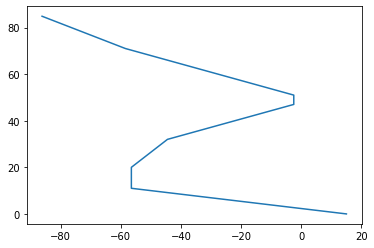

In [2]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
T = [15.0, -56.5, -56.5, -44.5, -2.5, -2.5, -58.5, -86.2]
h = [0., 11, 20., 32., 47, 51., 71, 84.852]
ax.plot(T, h)

#### スクリプトの解説

1行目: importはライブラリの機能を追加します。標準でPythonに認識されるキーワードは36個です。importスクリプト中で使える言葉が増えます。語彙の集まりを「名前空間」といいます。上のスクリプトでは，matplotlib.pyplotを名前空間に追加しpltとして使うことを宣言しています。

3行目: pltに含まれているsubplots()でfigure及びaxesオブジェクトを取得してfigとaxという変数に格納しています。オブジェクトは部品です。figureオブジェクトは画の入れ物である図を指しています。axes（axisの複数形）は座標軸の集まり，すなわち描画する図の中身です。matplotlibでは，図の入れ物と図の中身をfigure, axesとして分離していることを理解しておきましょう。

4～5行目: 気温と高さをそれぞれTとhに格納しています。数字を角括弧の中にカンマで並べてひとまとまりにしています。このデータ構造をリストといいます。

6行目: 二つのリストをそれぞれx, yの値としてax.plot()渡して描画します。plotは入れ物であるfigureではなく図の中身axesに含まれています。

7行目: 図を画面表示します。

図の保存
自分のパソコン上でJupyter notebooksを動かしている場合は，

```python
fig.savefig("standard.png")
```

とすれば描画した図を保存できます。この例ではPNG形式ですが，そのほかの形式でも保存できます。拡張子をpdfにすれば，拡大してもきれいなPDF形式になります。Google Colaboratoryで描画した図を保存するもっとも簡単な方法は，図をドラッグ＆ドロップすることです。ダウンロードするには

```python
from google.colab import files

fig.savefig("standard.pdf")
files.download("standard.pdf")
```

とします。仮想マシン上で動いているためです。


#### グラフの見栄え

グラフにタイトルや軸ラベルをつけたり，目盛を振りなおしたりして，見やすくしてみましょう。

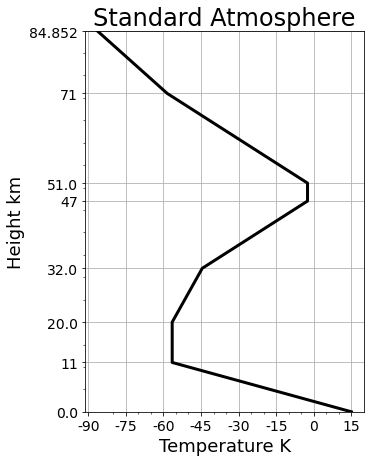

In [19]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(5, 7))

T = [15.0, -56.5, -56.5, -44.5, -2.5, -2.5, -58.5, -86.2]
h = [0., 11, 20., 32., 47, 51., 71, 84.852]
ax.plot(T, h, linewidth=3, color="black")

ax.set_title("Standard Atmosphere", fontsize=24)
ax.set_xlabel("Temperature K", fontsize=18)
xticks = range(-90, 20, 15)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=14)
ax.set_xticks(range(-80, 20, 5), minor=True)
ax.set_ylabel("Height km", fontsize=18)
ax.set_yticks(h)
ax.set_yticklabels(h, fontsize=14)
ax.set_yticks(range(0, 90, 5), minor=True)
ax.set_ylim(h[0], h[-1])
ax.grid()

4行目: グラフのサイズを指定して，縦長します。単位はインチです。

8行目: 白黒印刷を想定して，線の色を黒にしました。線の太さを3ptに太くしました。`lw=3, c="k"`と省略形で書くこともできます。

```python
ax.set_title("Standard Atmosphere", fontsize=24)
ax.set_xlabel("Temperature K", fontsize=18)
```

10, 11行目: タイトルをつけフォントサイズを24ポイントにしました。同様に，x軸にラベルをつけ，フォントサイズを18ptにしました。

12～14行目: `range()`を使って－90から5刻みのリストを作り`xticks`に格納しています。20は含まれないので，15までになります。`set_xticks()`で目盛を振ります。`set_xticklabels()`で目盛につけるラベル（文字）を指定します。ここでは座標値をラベルにも使っていますが，異なるラベルをつけることもできます。

15行目: 副目盛を5刻みで振ります。`minor=True`は副目盛を指定していること示します。

16～20行目: 同様にy軸のラベルや目盛，目盛ラベルを指定します。主目盛は`h`の値，副目盛は5 km刻みにしました。set_ylim()でy軸の範囲を指定しています。`h[0]`は最初の要素0，`h[-1]`は最後の要素84.852を表しています。

21行目: 格子を描いています。

## Numpy入門

### 黒体放射

全てのエネルギーを吸収する仮想的な物質を「黒体」と言います。太陽や地球を黒体と仮定して，放射輝度を計算してみましょう。


Pythonでは関数の定義には`def`を使います。関数名に続いて()の中に引数を,で区切って並べます。定数`c1`, `c2`を計算したあと関数値を`return`で返しています。

In [11]:
def l_planck_func(l, T):
    c1 = 2 * pi * c**2 * h 
    c2 = c * h / k
    return c1 * l**-4 / (pi * (np.exp(c2/(l * T))-1))

この関数を描画する前に，関数を呼び出して太陽と地球の放射輝度の最大値を確認しておきましょう。

In [12]:
l = np.logspace(-1, 2)
lw = l_planck_func(l * 1e-6, 255)
sw = l_planck_func(l * 1e-6, 6000)
print(f"sw.max() = {sw.max():.2e} lw.max() = {lw.max():.2e}")
print(f"sw.max()/lw.max(=){sw.max()/lw.max():.2e}")

sw.max() = 1.72e+07 lw.max() = 5.60e+01
sw.max()/lw.max(=)3.07e+05


1行目: 対数空間で均等な配列を生成します。Numpyの配列`ndarray`は，同じ型と大きさのデータを入れる多次元配列です。既定では要素数は50個です。要素数を変えたいときは，3番目の引数として与えます。$10^{-1}$から$10^{-2}$㎛を含む範囲で等間隔に50個の要素が計算されます。`range()`や`np.arange()`とは異なり終点の値を含む閉区間であることに注意しましょう。

lは㎛なので10−6を掛けて自作の関数l_planck_funcに渡します。print()は値を印字する関数です。sw.max()やlw.max()はswやlwの最大値を返します。文字列は""または''で囲みます。fはフォーマット文字列であることを示しています。フォーマット文字列は文字列中に{}で囲った変数の値を参照できる大変便利なものです。:.2eはフォーマットを表し，小数点以下2桁の浮動小数点に整形されます。波長が短いほど放射輝度は大きいので，太陽の黒体放射輝度は地球の約30万倍あります。一つの図に描くために最大値で規格化することにします。

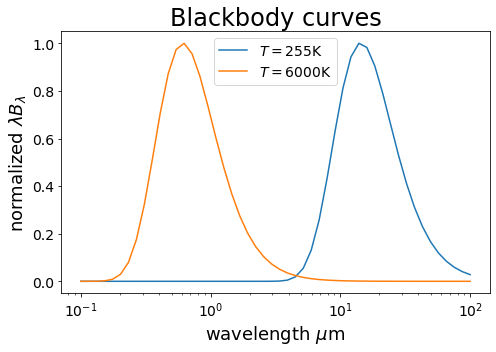

In [10]:
from scipy.constants import pi, c, h, k
import numpy as np
import matplotlib.pyplot as plt

l = np.logspace(-1, 2)
lw = l_planck_func(l * 1e-6, 255)
sw = l_planck_func(l * 1e-6, 6000)

lw = lw / lw.max()
sw = sw / sw.max()

fig, ax = plt.subplots(figsize=(7,5))
ax.semilogx(l, lw, label="$T=255$K")
ax.semilogx(l, sw, label="$T=6000$K")
ax.set_title("Blackbody curves", fontsize=24)
ax.set_xlabel("wavelength $\mu$m", fontsize=18)
ax.set_ylabel("normalized $\lambda B_\lambda$", fontsize=18)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
fig.tight_layout()

1行目 `scipy.constants`の定数を使えるようにしています。

2行目 `numpy`を`np`という名前に短くしています。
Pythonには数学函数が定義されていません。
例えば指数函数は`np.exp()`と呼び出します。

### 配列

前節ではNumpyに含まれる指数函数を使いました。Numpyには数学函数が多数定義されているだけでなく，ndarrayと呼ばれる配列が提供されていることが特長です。配列はリストに似ていますが，メモリ上で連続的に配置され高速にアクセスすることができます。配列に対する数学函数や線型代数演算を高速に行うことができます。PythonはFortranやCなどのコンパイル型言語と比較して100倍程度遅いのですが，ndarrayに対する演算はライブラリを呼び出すことによって行われるため，コンパイル型言語に遜色ないスピードで行うことが可能です。

2.5度の等緯度経度格子をndarrayで作成してみましょう。

In [13]:
import numpy as np
nlon = 144
nlat =  73
lon = 360 / nlon * np.arange(nlon)
lat = np.linspace(-90, 90, nlat)

`np.arange()`は指定した間隔で等間隔の値を生成します。既定では最初の値は0，間隔は1であり，Pythonのrange()同様に連続する整数を生成します。`np.arange()`は整数でない間隔を持つ値を生成することもできます。

In [14]:
dlon = 360 / nlon
lon = np.arange(0, 360 - dlon, dlon)

としても同様に経度を生成できます。`np.linspace()`は指定された範囲を等間隔に分割した数を返します。

FortranやCのように要素毎に値を計算することもできます。

In [15]:
lon = np.zeros(nlon)
dlon = 360 / nlon
for i in range(nlon):
    lon[i] = dlon * i

`np.zeros()`は指定した数0が並んだ配列を返します。`np.ones()`は1が並んだ配列，`np.array()`は値が初期化されていない配列を返します。`for`文は繰り返し処理を行います。`range()`で生成された`0`から`nlon-1`までの値が順番に`i`に入り，字下げされたブロックが実行されます。`for`の行が`:`で終わっていることに注意してください。また，Cのようにブロックを`{}`で囲ったり，Fortranのように`end do`のようなループの終了するための文は必要ありません。字下げにより分かりやすく少ない行数で書けることがPythonの特長です。

ループはNumpyが呼び出すライブラリではなく，Pythonの文として実行されるため，高速であるNumpyの特長を活かすことができません。なるべくループを使わないで書くことが速いコードを書くコツです。

緯度は，短く書けるリスト内包表記を使ってみましょう。

In [16]:
dlat = 180 / (nlat - 1)
lat = np.array([-90 + dlat * j for j in range(nlat)])

ここにも`for`がありますが，リストの内側に包まれているのでリスト内包表記といいます。`range()`で生成される0からnlat-1までの整数に対する要素からなるリストが作られ，`np.array()`で配列に変換されます。

Numpyの線型代数演算等については，この後の章で取り上げます。

## Fortran資産の活用

数値計算手法は60～80年代にかけて基本的なアルゴリズムが提案され，多くの優れたコードが蓄積されてきました。多くのコードはFortranで書かれています。ここでは，既存のFortranコードをNumpyの一部として提供されているf2pyを使って，Pythonから呼び出してみましょう。

データを使ってみようと思ったら，緯度方向が不等間隔だったということはありませんか。JRA-55等のモデル面データがこれに該当し，ガウス緯度と呼ばれています。ガウス緯度に格子点を配置するのは精度を向上させるためです。ガウス緯度はメタデータとして提供されることもありますが，格子点数が与えられれば計算で求めることができます。Pythonで実装することも可能ですが，ここではSPHEREPACKに含まれている`gaqd.f`を利用します。

SPHEREPACKはUCARから提供されています。DownloadタブのI agreeボタンをクリックするとソースやドキュメントのページが表示されます。氏名等を登録する必要はありません。これまでに述べた方法でPythonからダウンロードしてもいいのですが，ここでは`curl`コマンドで取得し，`tar`コマンドで展開します。`gaqd.f`は単体で動作するので，カレントディレクトリにコピーを作成します。

In [17]:
!curl -O https://www2.cisl.ucar.edu/sites/default/files/spherepack3.2.tar
!tar xvf spherepack3.2.tar
!cp spherepack3.2/src/gaqd.f .

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 3537k    0  6855    0     0   6855      0  0:08:48  0:00:01  0:08:47  5484
100 3537k  100 3537k    0     0  3537k      0  0:00:01  0:00:01 --:--:-- 2155k
x spherepack3.2/
x spherepack3.2/doc/
x spherepack3.2/lib/
x spherepack3.2/make.inc
x spherepack3.2/Makefile
x spherepack3.2/objs/
x spherepack3.2/output/
x spherepack3.2/src/
x spherepack3.2/test/
x spherepack3.2/test/Makefile
x spherepack3.2/test/tdiv.f
x spherepack3.2/test/testrssph.f
x spherepack3.2/test/testrvsph.f
x spherepack3.2/test/testsshifte.f
x spherepack3.2/test/testvshifte.f
x spherepack3.2/test/testvtsgs.f
x spherepack3.2/test/tgaqd.f
x spherepack3.2/test/tgrad.f
x spherepack3.2/test/tidvt.f
x spherepack3.2/test/tsha.f
x spherepack3.2/test/tshpe.f
x spherepack3.2/test/tshpg.f
x sphe

`f2py`はFortranのソースを解析し，Pythonから呼び出せる共有ライブラリを生成します。`f2py`の使い方は簡単です。

In [18]:
!python -m numpy.f2py -c gaqd.f -m gaqd

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "gaqd" sources
f2py options: []
f2py:> C:\Users\subhi\AppData\Local\Temp\tmp_a_48mjz\src.win-amd64-3.9\gaqdmodule.c
creating C:\Users\subhi\AppData\Local\Temp\tmp_a_48mjz\src.win-amd64-3.9
Reading fortran codes...
	Reading file 'gaqd.f' (format:fix,strict)
Post-processing...
	Block: gaqd
{}
In: :gaqd:gaqd.f:gaqd
vars2fortran: No typespec for argument "nlat".
{}
In: :gaqd:gaqd.f:gaqd
vars2fortran: No typespec for argument "lwork".
{}
In: :gaqd:gaqd.f:gaqd
vars2fortran: No typespec for argument "ierror".
			Block: gaqd
{}
In: :gaqd:gaqd.f:cpdp
vars2fortran: No typespec for argument "n".
			Block: cpdp
{}
In: :gaqd:gaqd.f:tpdp
vars2fortran: No typespec for argument "n".
			Block: tpdp
			Block: dzeps
Post-processing (stage 2)..

error: extension 'gaqd' has Fortran sources but no Fortran compiler found


`python`コマンドの`m`オプションで`numpy.f2py`を指定します。環境によっては`f2py`コマンドが使えますが，上記の方法では`python`コマンドのバージョンと一貫した`f2py`が用いられます。Colaboratoryには`f2py`があるようですが，上記の方法でないとうまくいきませんでした。

コマンドを実行し無事`gaqd`で始まり`.so`で終わるファイル名の共有ライブラリが生成されれば，おなじみの`import`コマンドを使って読むことができます。

In [ ]:
import gaqd
print(gaqd.gaqd.__doc__)

自動生成されたドキュメントが表示されるはずです。

```
gaqd(theta,wts,w,lwork,ierror,[nlat])

Wrapper for ``gaqd``.

Parameters
----------
theta : input rank-1 array('d') with bounds (nlat)
wts : input rank-1 array('d') with bounds (nlat)
w : input float
lwork : input int
ierror : input int

Other Parameters
----------------
nlat : input int, optional
    Default: len(theta)
```

`gaqd`には過去のバージョンに適合させるために使っていない作業配列とその長さが引数にあります。また，ガウス余緯度とガウス重みを準備して渡す必要があります。余緯度は北極から測り90°－緯度です。これらの長さはガウス余緯度の配列の長さから推定できるのでオプションになっています。その結果一つだけFortranよりも引数が短くなっています。

In [ ]:
import numpy as np
 
nlat = 32
theta = np.zeros(nlat)
wts = np.zeros(nlat)
gaqd.gaqd(theta, wts, 1.0, 1, 1)

np.rad2deg(theta)を実行すると0°よりも少し大きい値から180°より少し小さい値が表示されます。重みは

In [ ]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots()
ax.scatter(theta, wts

で描くことができます。重みの和`wts.sum()`は2に近い値になるはずです。

ソースコードに少し手を入れて，Pythonらしく引数を簡単にしてみましょう。変数の宣言87行目の後に
 
```Fortran
Cf2py intent(in) nlat
Cf2py intent(out) theta
Cf2py intent(out) wts
Cf2py intent(hide) w
Cf2py intent(hide) lwork
Cf2py intent(hide) ierror
```
を入れます。`C`で始まるのでFortranから見るとコメント行ですが，その後に`f2py`がついているのでf2pyに対する指示行になります。Fortran 90のインテント属性を拡張した記法で引数について記述します。`nlat`を`intent(in)`の必須とします。`theta`と`wts`は`intent(out)`とし，引数からは隠され返り値になります。`intent(out)`とすると，引数から隠す`intent(hide)`も同時に指定されるからです。`w`, `lwork`, `ierror`に`intent(hide)`を指定して隠します。Colaboratoryでは，一番左のフォルダのアイコンをクリックしてファイルを表示して`gaqd.f`をダブルクリックすると編集できます。編集後閉じると自動保存されます。

指示行を追加して保存したら，再度`f2py`を実行します。モジュール名はソースコードと別でも構わないのでここでは`spherepack`としています。

In [ ]:
!python -m numpy.f2py -c -m spherepack gaqd.f

改変されたソースから作成したモジュールでは引数が`nlat`で返り値が`theta`と`wts`になり使いやすくなりました。

In [ ]:
from spherepack import gaqd
print(gaqd.__doc__)
theta,wts = gaqd(nlat)

```
Wrapper for ``gaqd``.
 
Parameters
----------
nlat : input int
 
Returns
-------
theta : rank-1 array('d') with bounds (nlat)
wts : rank-1 array('d') with bounds (nlat)
```

余緯度でなく緯度に変換して返す関数は次のように書けます。NCLの`gaus()`同様に緯度方向の格子点数を渡すだけでガウス緯度とガウス重みが計算できるようになりました。

In [ ]:
from spherepack import gaqd
 
def gaus(n):
    theta, wts = gaqd(n)
    return np.arcsin(np.cos(theta)), wts

この章ではとにかく図を描いてみるところからはじめて，関数定義のしかたやNumpyの配列の使い方を学びました。Fortranコードを使うところは少し難しかったかもしれませんが，Pythonの欠点を補い，これまでの豊富な資産を活かすことができることを理解していただけたかと思います。

次の章では様々なデータを読んで可視化していきます。